In [1]:
import pandas as pd
import numpy as np

In [36]:
raw_data = pd.read_csv("C:/Users/Abhishek/Documents/Jupiter_Notebook/Datasets/mnist_train.csv")

In [37]:
raw_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
actual_labels = raw_data['label']

In [39]:
C = np.eye(10,10)[actual_labels]

In [40]:
C

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [41]:
C.shape

(60000, 10)

In [42]:
raw_data.drop(['label'],axis=1,inplace=True)

In [43]:
raw_data=raw_data-raw_data.max()
#raw_data=raw_data/raw_data.std()[raw_data.std()!=0]
raw_data.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,-254,-254,-253,-253,-254,-62,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,-254,-254,-253,-253,-254,-62,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,-254,-254,-253,-253,-254,-62,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,-254,-254,-253,-253,-254,-62,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,-254,-254,-253,-253,-254,-62,0,0,0,0


In [44]:
X = np.array(raw_data)

In [45]:
X.shape

(60000, 784)

In [46]:
B = 128

In [47]:
import tensorflow as tf

In [60]:
neurons = [X.shape[1],X.shape[1],X.shape[1],X.shape[1],X.shape[1],C.shape[1]]

In [61]:
layer0_activations = tf.placeholder(dtype=tf.float32,shape=[None,X.shape[1]])

In [62]:
layer_activations = [layer0_activations]

layer_params = [0]

layer_params0=[0]

In [78]:
for i in range(len(neurons)-2):
    layer_thetas = tf.Variable(initial_value=tf.random_normal(shape=[neurons[i],neurons[i+1]]))
    
    layer_theta0=tf.Variable(initial_value=tf.random_normal(shape=[1,neurons[i+1]]))
    
    layer_params.append(layer_thetas)
    
    layer_params0.append(layer_theta0)
    
    layer_output = tf.sigmoid(tf.matmul(layer_activations[i],layer_params[i+1]))+layer_params0[i+1]
    
    layer_activations.append(layer_output)
    
layer_thetas=tf.Variable(initial_value=tf.random_normal(shape=[X.shape[1],C.shape[1]]))

layer_theta0=tf.Variable(initial_value=tf.random_normal(shape=[1,neurons[5]]))

layer_output = tf.nn.softmax(tf.matmul(layer_activations[4],layer_thetas))+layer_theta0
    
nn_out = layer_output

In [79]:
print(nn_out)

Tensor("add_5:0", shape=(?, 10), dtype=float32)


In [80]:
true_labels = tf.placeholder(dtype=tf.float32,shape=[None,C.shape[1]])

In [81]:
cross_entropy_per_example = tf.nn.softmax_cross_entropy_with_logits(labels=true_labels,logits=nn_out)

avg_cross_entropy_loss = tf.reduce_mean(cross_entropy_per_example) 

In [88]:
#gradient_descent_step = tf.train.GradientDescentOptimizer(learning_rate=0.01)
gradient_descent_step = tf.train.AdamOptimizer()

In [89]:
minimization = gradient_descent_step.minimize(avg_cross_entropy_loss)

In [90]:
iterations_per_epoch = int(X.shape[0]/B)

epoch = 200

loss=[]
iteration=[-1]
epoch_list=[]

with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    for i in range(0,epoch*iterations_per_epoch):

        random_indices = np.random.choice(np.arange(0,X.shape[0]),size=B,replace=False)

        data_mini_batch = X[random_indices]

        labels_mini_batch = C[random_indices]

        data2feed = {layer0_activations:data_mini_batch,true_labels:labels_mini_batch}

        s.run([minimization],feed_dict=data2feed)

        loss_fn_value = s.run([avg_cross_entropy_loss],feed_dict=data2feed)
        
        loss.append(loss_fn_value)
        iteration.append(iteration[-1]+1)
        
        if (i+1) % iterations_per_epoch == 0:
            epoch_number = int((i+1)/iterations_per_epoch)
            epoch_list.append(epoch_number)
            print("Epoch # =",epoch_number,"Loss =",loss_fn_value)

Epoch # = 1 Loss = [2.5739632]
Epoch # = 2 Loss = [2.4436977]
Epoch # = 3 Loss = [2.350563]
Epoch # = 4 Loss = [2.3382487]
Epoch # = 5 Loss = [2.2834897]
Epoch # = 6 Loss = [2.3201056]
Epoch # = 7 Loss = [2.2980466]
Epoch # = 8 Loss = [2.3043244]
Epoch # = 9 Loss = [2.2962515]
Epoch # = 10 Loss = [2.2926595]
Epoch # = 11 Loss = [2.3036456]
Epoch # = 12 Loss = [2.2921386]
Epoch # = 13 Loss = [2.3021643]
Epoch # = 14 Loss = [2.2953255]
Epoch # = 15 Loss = [2.2953594]
Epoch # = 16 Loss = [2.3063905]
Epoch # = 17 Loss = [2.3040063]
Epoch # = 18 Loss = [2.2887032]
Epoch # = 19 Loss = [2.2881098]
Epoch # = 20 Loss = [2.305678]
Epoch # = 21 Loss = [2.2957635]
Epoch # = 22 Loss = [2.3000476]
Epoch # = 23 Loss = [2.3055382]
Epoch # = 24 Loss = [2.3058505]
Epoch # = 25 Loss = [2.3025062]
Epoch # = 26 Loss = [2.3079023]
Epoch # = 27 Loss = [2.3053026]
Epoch # = 28 Loss = [2.2894492]
Epoch # = 29 Loss = [2.3052008]
Epoch # = 30 Loss = [2.3041818]
Epoch # = 31 Loss = [2.309355]
Epoch # = 32 Loss = 

In [91]:
import matplotlib.pyplot as plt

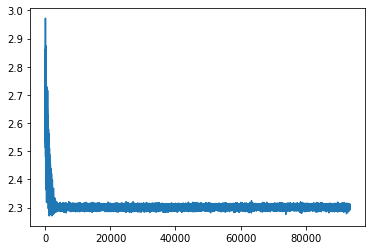

In [92]:
plt.plot(iteration[1:],loss)

In [93]:
min(loss)

[2.2704682]